In [1]:
from energyflow.archs.moment import EFN_moment as moment_model
#from energyflow.archs.moment_simplified import EFN_moment as moment_model
#from energyflow.archs.moment_rweighted import PFN_moment as moment_model
from energyflow.datasets import qg_jets
from tensorflow.keras.models import load_model
from energyflow.archs.efn import EFN as normal_model
from tensorflow.keras.callbacks import ModelCheckpoint
from math import comb
from numpy import load,average, arctan2, sqrt, stack, cos, sin
import numpy as np
import tensorflow as tf
from energyflow.utils import data_split

In [2]:
latent = 2
order = 2
output_dim = 1
num_epoch = 20
batch_size = 500
input_dim=[2]
loss = 'mse'
metrics = ['mse']
verbose = 2

In [3]:
data = qg_jets.load(300000)

In [4]:
X = data[0]
del data

In [5]:
from numpy import sqrt, cos, std

In [6]:
X = X[:,:,:3]
Y = []
for x in X:
    mask = x[:,0] > 0
    yphi_avg = average(x[mask,1:3], weights=x[mask,0], axis=0)
    x[mask,1:3] -= yphi_avg
    x[mask,0] /= x[:,0].sum()
    y = 2*sum(x[mask,0]*(1 - cos(sqrt(x[mask,1]**2 + x[mask,2]**2))) )
    Y.append(y)

In [7]:
 Y=np.array(Y)

In [8]:
train = 210000
val = 60000
test = 30000

In [9]:
(z_train, z_val, z_test, 
p_train, p_val, p_test,
Y_train, Y_val, Y_test) = data_split(X[:,:,0], X[:,:,1:3],Y, val=val, test=test)

In [10]:
X_train, X_val, X_test = [z_train, p_train], [z_val, p_val], [z_test, p_test]

In [11]:
del X,Y

In [ ]:
moment_auc_list = []
efn_auc_list = []
for i in range(10):
    x=1
    while x > 1e-9:  
        moment = moment_model(Phi_k_inits = 'identity',F_k_inits = 'ones', Phi_mapping_dim = [2,2], F_acts= None, Phi_acts=None, bias = False, loss=loss ,metrics=metrics, order=order, architecture_type = 'moment', output_dim=output_dim, output_act='linear', Phi_sizes=[], F_sizes=[], summary=True)
        moment.fit(X_train, Y_train,
                        epochs=100,
                        batch_size=batch_size, 
                        validation_data=(X_val, Y_val),
                        verbose=verbose)
        x = sum((moment.predict(X_test)[:,0] - Y_test)**2)/10000
    moment_auc_list.append(x)
    efn = normal_model(loss=loss,metrics=metrics,Phi_acts=['linear'] ,input_dim=2,output_dim=output_dim,output_act='linear', Phi_sizes=[6], F_sizes=[], summary=True)
    efn.fit(X_train, Y_train,
                    epochs=10,
                    batch_size=batch_size, 
                    validation_data=(X_val, Y_val),
                    verbose=verbose)
    efn_auc_list.append(sum((efn.predict(X_test)[:,0] - Y_test)**2)/10000)
    
    

C:\Users\athis\Anaconda3\lib\site-packages\energyflow\archs\moment_layers.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  matrix = np.array([[1 for x in list(flatten_list(itmd_id_list[i:]))] for i in range(len(itmd_id_list))])


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 2)]    0                                            
__________________________________________________________________________________________________
tdist0_0 (TimeDistributed)      (None, None, 2)      4           input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, None, 2)      0           tdist0_0[0][0]                   
__________________________________________________________________________________________________
zs_input (InputLayer)           [(None, None)]       0                                            
______________________________________________________________________________________________

Epoch 54/100
420/420 - 1s - loss: 1.9123e-05 - mse: 1.9123e-05 - val_loss: 1.8989e-05 - val_mse: 1.8989e-05
Epoch 55/100
420/420 - 1s - loss: 1.9103e-05 - mse: 1.9103e-05 - val_loss: 1.9081e-05 - val_mse: 1.9081e-05
Epoch 56/100
420/420 - 1s - loss: 1.9115e-05 - mse: 1.9115e-05 - val_loss: 1.8990e-05 - val_mse: 1.8990e-05
Epoch 57/100
420/420 - 1s - loss: 1.9131e-05 - mse: 1.9131e-05 - val_loss: 1.9211e-05 - val_mse: 1.9211e-05
Epoch 58/100
420/420 - 1s - loss: 1.9118e-05 - mse: 1.9118e-05 - val_loss: 1.8990e-05 - val_mse: 1.8990e-05
Epoch 59/100
420/420 - 1s - loss: 1.9104e-05 - mse: 1.9104e-05 - val_loss: 1.9048e-05 - val_mse: 1.9048e-05
Epoch 60/100
420/420 - 1s - loss: 1.9096e-05 - mse: 1.9096e-05 - val_loss: 1.9010e-05 - val_mse: 1.9010e-05
Epoch 61/100
420/420 - 1s - loss: 1.9092e-05 - mse: 1.9092e-05 - val_loss: 1.9020e-05 - val_mse: 1.9020e-05
Epoch 62/100
420/420 - 1s - loss: 1.9129e-05 - mse: 1.9129e-05 - val_loss: 1.9039e-05 - val_mse: 1.9039e-05
Epoch 63/100
420/420 - 1s - 

In [ ]:
moment = moment_model(Phi_k_inits = 'identity', Phi_mapping_dim = [2,2], F_acts= None, Phi_acts=None, bias = False, loss=loss ,metrics=metrics, order=order, architecture_type = 'moment', output_dim=output_dim, output_act='linear', Phi_sizes=[], F_sizes=[], summary=True)
moment.layers[1].trainable = False
moment.layers[-2].set_weights(np.array([[[0],[0],[0],[1],[0],[1]]]))
moment.layers[-2].trainable = False
moment._model.compile(loss=loss, optimizer='adam')
moment.fit(X_train, Y_train,
                        epochs=200,
                        batch_size=750, 
                        validation_data=(X_val, Y_val),
                        verbose=verbose)

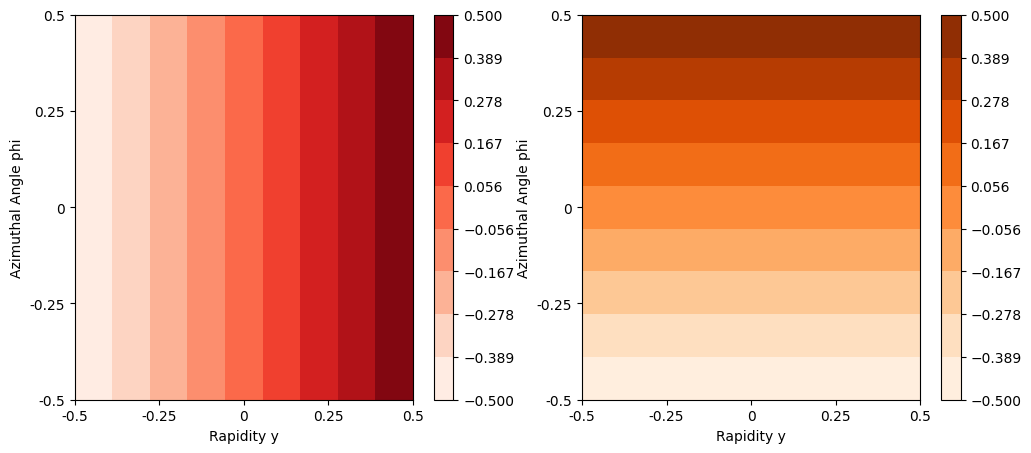

(<Figure size 1200x500 with 4 Axes>,
 array([<AxesSubplot:xlabel='Rapidity y', ylabel='Azimuthal Angle phi'>,
        <AxesSubplot:xlabel='Rapidity y', ylabel='Azimuthal Angle phi'>],
       dtype=object))

In [113]:
moment.plot_phis(0.5)

In [115]:
F_weights = moment.layers[-2].weights[0][:,0]
dummy, k1,k2,k3,k4,k5  = F_weights
Phi_weights = moment.layers[1].weights[0]
a,b,c,d = list(Phi_weights[0]) + list(Phi_weights[1])
K = 4*k1*k2*k4

In [116]:
print(F_weights)

tf.Tensor(
[ 1.7594934e-05  6.0794241e-07 -2.1223917e-05  9.9500912e-01
  1.5486356e-04  9.9487692e-01], shape=(6,), dtype=float32)


In [100]:
K*a*d + K*b*c + 2*k3*a*b + 2*k5*c*d

<tf.Tensor: shape=(), dtype=float32, numpy=1.1883218>

In [ ]:
efn.fit(X_train, Y_train,
                epochs=100,
                batch_size=batch_size, 
                validation_data=(X_val, Y_val),
                verbose=verbose)

In [ ]:
moment.save('C:/Users/athis/energyflow/networks/jetmass/moment')

In [ ]:
efn.save('C:/Users/athis/energyflow/networks/jetmass/efn_linear')

In [ ]:
data_test = load('C:/Users/athis/.energyflow/datasets/QG_jets_18.npz', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
X_test = data_test['X']
del data_test

In [ ]:
X_test = X_test[:,:,:3][0:10000]
Y_test = []
for x in X_test:
    mask = x[:,0] > 0
    yphi_avg = average(x[mask,1:3], weights=x[mask,0], axis=0)
    x[mask,1:3] -= yphi_avg
    x[mask,0] /= x[:,0].sum()
    y = sum(x[mask,0]*(x[mask,1]**2 + x[mask,2]**2))
    Y_test.append(y)
X_test = [X_test[:,:,0], X_test[:,:,1:]]
Y_test = np.array(Y_test)

In [ ]:
moment = load_model('C:/Users/athis/energyflow/networks/jetmass/moment')
efn_relu = load_model('C:/Users/athis/energyflow/networks/jetmass/efn_relu')
efn_linear = load_model('C:/Users/athis/energyflow/networks/jetmass/efn_linear')

In [ ]:
Y_pred_list = [moment.predict(X_test), efn_relu.predict(X_test), efn_linear.predict(X_test)]

In [ ]:
mse_list = [np.square(np.subtract(Y_test,Y_pred.squeeze()/100)).mean() for Y_pred in Y_pred_list]
names = ['moment', 'efn_relu', 'efn_linear']

In [ ]:
moment_auc = average(moment_auc_list)
moment_std = std(moment_auc_list)
efn_auc = average(efn_auc_list)
efn_std = std(efn_auc_list)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(10,10))
axes.set_ylabel('MSE')
axes.bar(['2-Moment EFN', 'EFN'], [moment_auc, efn_auc])
plt.errorbar(['2-Moment EFN', 'EFN'], [moment_auc, efn_auc], yerr=[moment_std, efn_std], fmt="o", color="r", capsize=15)
axes.set_yscale('log')
axes.set_ylim(0, 10**(-4))
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10,10))
axes.scatter(Y_test,Y_pred_list[0].squeeze()/100)
axes.set_ylabel('Moment Model Prediction')
axes.set_xlabel('True Jet Mass Squared')
plt.show()

In [ ]:
print(moment_auc, efn_auc, moment_std, efn_std)